In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Frecuencia de muestreo con 4000 muestras: 25000.00 Hz
Frecuencia de muestreo con 1Mega muestras: 5000000.00 Hz

Con 4000 muestras:
Valor máximo del canal 1 es 0.44 en 337.67 Hz
Valor máximo del canal 2 es 0.30 en 337.67 Hz
Fase del canal 1 a los 337.67 Hz: -1.20rad
Fase del canal 2 a los 337.67 Hz: -0.40rad


Con 1Mega muestras:
Valor máximo del canal 1 es 0.44 en 340.00 Hz
Valor máximo del canal 2 es 0.30 en 340.00 Hz
Fase del canal 1 a los 340.00 Hz: -1.42rad
Fase del canal 2 a los 340.00 Hz: -0.60rad


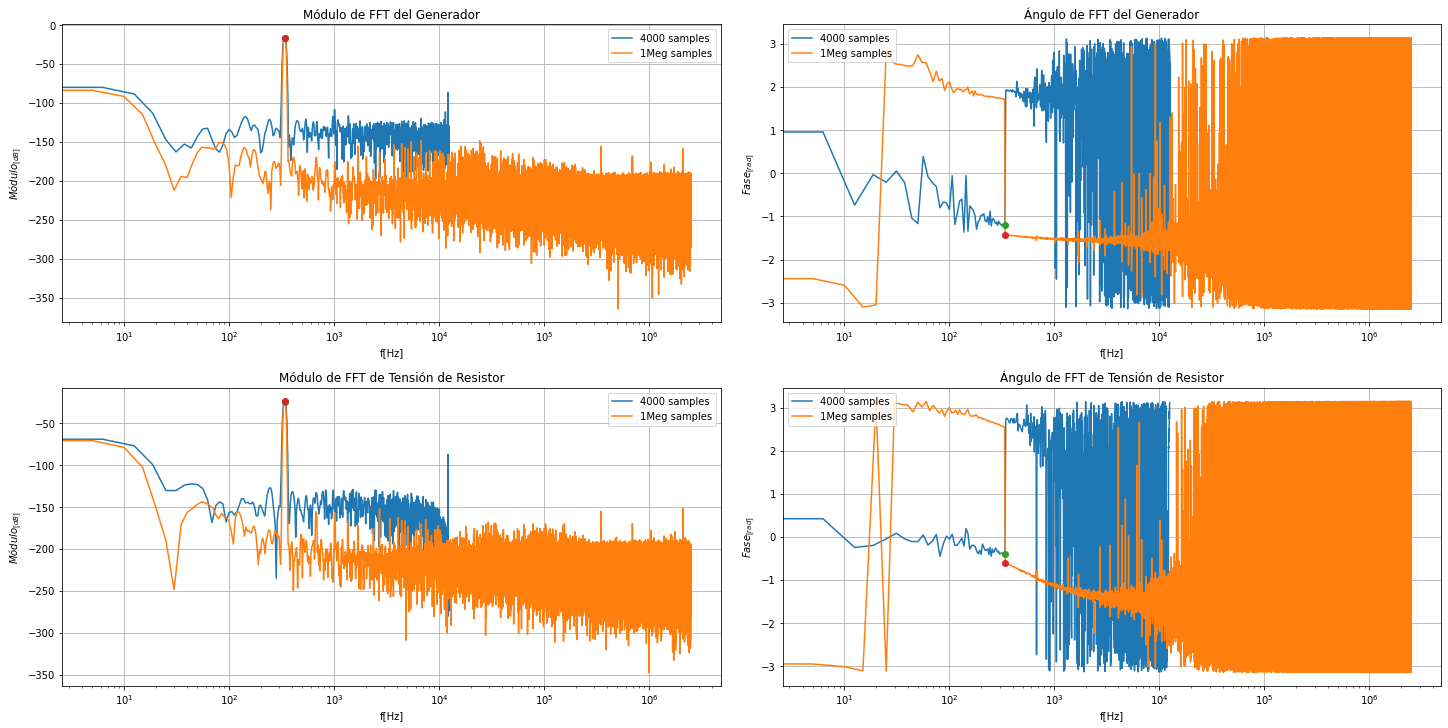

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

from numpy import genfromtxt

plt.close('all')

archivo_CH1 = '/content/drive/MyDrive/Medidas 1/MedicionesCSV/A0001CH1.CSV'
archivo_CH2 = '/content/drive/MyDrive/Medidas 1/MedicionesCSV/A0001CH2.CSV'
archivo_CH1_1M = '/content/drive/MyDrive/Medidas 1/MedicionesCSV/A0002CH1.CSV'
archivo_CH2_1M = '/content/drive/MyDrive/Medidas 1/MedicionesCSV/A0002CH2.CSV'

CH1_CSV = genfromtxt(archivo_CH1, delimiter=',')
CH2_CSV = genfromtxt(archivo_CH2, delimiter=',')

CH1_CSV_1M = genfromtxt(archivo_CH1_1M, delimiter=',')
CH2_CSV_1M = genfromtxt(archivo_CH2_1M, delimiter=',')

tiempo = CH1_CSV[:,0]
tension_CH1 = CH1_CSV[:,1]
tension_CH2 = CH2_CSV[:,1]

tiempo_1M = CH1_CSV_1M[:,0]
tension_CH1_1M = CH1_CSV_1M[:,1]
tension_CH2_1M = CH2_CSV_1M[:,1]

fs = 1 / (tiempo[2] - tiempo[1])
fs_1M = 1 / (tiempo_1M[2] - tiempo_1M[1])

print("Frecuencia de muestreo con 4000 muestras: %0.2f Hz" %fs)
print("Frecuencia de muestreo con 1Mega muestras: %0.2f Hz" %fs_1M)

#Al no haber picos de amplitud cercanos en frecuencia, no es necesario utilizar la Hanning para distinguirlos
#Se utiliza únicamente la flat top para medir con menor error la amplitud
#Para la medición de la fase, hacemos la transformada con ventana rectangular (sin ventana)
ventana_flat_top = signal.windows.flattop(len(tiempo))
ventana_flat_top_1M = signal.windows.flattop(len(tiempo_1M))

Factor_Correccion_FT = 4.18

tf_CH1 = np.fft.fft(tension_CH1, len(tiempo)) / len(tiempo)
tf_CH2 = np.fft.fft(tension_CH2, len(tiempo)) / len(tiempo)

tf_CH1_FT = Factor_Correccion_FT * np.fft.fft(tension_CH1*ventana_flat_top,len(tiempo)) / len(tiempo)
tf_CH2_FT = Factor_Correccion_FT * np.fft.fft(tension_CH2*ventana_flat_top,len(tiempo)) / len(tiempo)

tf_CH1_1M = np.fft.fft(tension_CH1_1M, len(tiempo_1M)) / len(tiempo_1M)
tf_CH2_1M = np.fft.fft(tension_CH2_1M, len(tiempo_1M)) / len(tiempo_1M)

tf_CH1_1M_FT = Factor_Correcion_FT * np.fft.fft(tension_CH1_1M * ventana_flat_top_1M, len(tiempo_1M)) / len(tiempo_1M)
tf_CH2_1M_FT = Factor_Correcion_FT * np.fft.fft(tension_CH2_1M * ventana_flat_top_1M, len(tiempo_1M)) / len(tiempo_1M)

# Separo parte pos de parte neg
tf_CH1_pos = tf_CH1[0:int(len(tiempo)/2)]
tf_CH1_pos_1M = tf_CH1_1M[0:int(len(tiempo_1M)/2)]

tf_CH1_pos_FT = tf_CH1_FT[0:int(len(tiempo)/2)]
tf_CH1_pos_1M_FT = tf_CH1_1M_FT[0:int(len(tiempo_1M)/2)]
# tf_CH1_neg = tf_CH1[int(len(tiempo)/2):int(len(tiempo))]
# tf_CH1_tot = np.concatenate((tf_CH1_neg,tf_CH1_pos))

tf_CH2_pos = tf_CH2[0:int(len(tiempo)/2)]
tf_CH2_pos_1M = tf_CH2_1M[0:int(len(tiempo_1M)/2)]

tf_CH2_pos_FT = tf_CH2_FT[0:int(len(tiempo)/2)]
tf_CH2_pos_1M_FT = tf_CH2_1M_FT[0:int(len(tiempo_1M)/2)]
# tf_CH2_neg = tf_CH2[int(len(tiempo)/2):int(len(tiempo))]
# tf_CH2_tot = np.concatenate((tf_CH2_neg,tf_CH2_pos))

#Defino vector de frecuencia solo para positivas
mitad_muestras = int(len(tiempo) / 2)
res_espectral = fs / len(tiempo)
freq = np.linspace(0,mitad_muestras,mitad_muestras) * res_espectral

mitad_muestras_1M = int(len(tiempo_1M) / 2)
res_espectral_1M = fs_1M / len(tiempo_1M)
freq_1M = np.linspace(0,mitad_muestras_1M,mitad_muestras_1M) * res_espectral_1M

fig,ax = plt.subplots(2,2,constrained_layout=True,figsize=(20,10))

#generador
##Modulo (Flat Top)
ax[0,0].plot(freq, 20*np.log(abs(tf_CH1_pos_FT)), freq_1M, 20*np.log(abs(tf_CH1_pos_1M_FT)))
ax[0,0].set_xlabel('f[Hz]')
ax[0,0].set_ylabel(r'$Módulo_{[dB]}$')
ax[0,0].set_xscale('log')
ax[0,0].grid()
ax[0,0].legend(['4000 samples', '1Meg samples'])
ax[0,0].set_title("Módulo de FFT del Generador")

##Fase (Sin ventana)
ax[0,1].plot(freq,np.angle(tf_CH1_pos), freq_1M,np.angle(tf_CH1_pos_1M))
ax[0,1].set_xlabel('f[Hz]')
ax[0,1].set_ylabel(r'$Fase_{[rad]}$')
ax[0,1].set_xscale('log')
ax[0,1].grid()
ax[0,1].legend(['4000 samples', '1Meg samples'])
ax[0,1].set_title("Ángulo de FFT del Generador")

#Resistencia
##Módulo (Flat Top)
ax[1,0].plot(freq, 20*np.log(abs(tf_CH2_pos_FT)), freq_1M, 20*np.log(abs(tf_CH2_pos_1M_FT)))
ax[1,0].set_xlabel('f[Hz]')
ax[1,0].set_ylabel(r'$Módulo_{[dB]}$')
ax[1,0].set_xscale('log')
ax[1,0].grid()
ax[1,0].legend(['4000 samples', '1Meg samples'])
ax[1,0].set_title("Módulo de FFT de Tensión de Resistor")

##Fase (Sin ventana)
ax[1,1].plot(freq,np.angle(tf_CH2_pos), freq_1M, np.angle(tf_CH2_pos_1M))
ax[1,1].set_xlabel('f[Hz]')
ax[1,1].set_ylabel(r'$Fase_{[rad]}$')
ax[1,1].set_xscale('log')
ax[1,1].grid()
ax[1,1].legend(['4000 samples', '1Meg samples'])
ax[1,1].set_title("Ángulo de FFT de Tensión de Resistor")
#plt.xscale("log")

#Averiguo valores máximos de amplitud, y respectiva frecuencia
ValMax_CH1 = np.max(abs(tf_CH1_pos_FT))
indice_ValMax_CH1 = np.argmax(abs(tf_CH1_pos_FT))

ValMax_CH1_1M = np.max(abs(tf_CH1_pos_1M_FT))
indice_ValMax_CH1_1M = np.argmax(abs(tf_CH1_pos_1M_FT))

ValMax_CH2 = np.max(abs(tf_CH2_pos_FT))
indice_ValMax_CH2 = np.argmax(abs(tf_CH2_pos_FT))

ValMax_CH2_1M = np.max(abs(tf_CH2_pos_1M_FT))
indice_ValMax_CH2_1M = np.argmax(abs(tf_CH2_pos_1M_FT))

#Los marco en el gráfico
ax[0,0].plot(freq[indice_ValMax_CH1], 20*np.log(ValMax_CH1),"o")
ax[0,0].plot(freq_1M[indice_ValMax_CH1_1M], 20*np.log(ValMax_CH1_1M),"o")
ax[0,0].legend(['4000 samples', '1Meg samples'])
ax[1,0].plot(freq[indice_ValMax_CH2], 20*np.log(ValMax_CH2),"o")
ax[1,0].plot(freq_1M[indice_ValMax_CH2_1M], 20*np.log(ValMax_CH2_1M),"o")
ax[1,0].legend(['4000 samples', '1Meg samples'])

#Marco las fases de las frecuencias encontradas
ax[0,1].plot(freq[indice_ValMax_CH1], np.angle(tf_CH1_pos[indice_ValMax_CH1]),"o")
ax[0,1].plot(freq_1M[indice_ValMax_CH1_1M], np.angle(tf_CH1_pos_1M[indice_ValMax_CH1_1M]),"o")
ax[0,1].legend(['4000 samples', '1Meg samples'])

ax[1,1].plot(freq[indice_ValMax_CH2], np.angle(tf_CH2_pos[indice_ValMax_CH2]),"o")
ax[1,1].plot(freq_1M[indice_ValMax_CH2_1M], np.angle(tf_CH2_pos_1M[indice_ValMax_CH2_1M]),"o")
ax[1,1].legend(['4000 samples', '1Meg samples'])

print("\nCon 4000 muestras:")
print("Valor máximo del canal 1 es %0.2f en %0.2f Hz" %(ValMax_CH1, freq[indice_ValMax_CH1]))
print("Valor máximo del canal 2 es %0.2f en %0.2f Hz" %(ValMax_CH2, freq[indice_ValMax_CH2]))
print("Fase del canal 1 a los %0.2f Hz: %0.2frad" %(freq[indice_ValMax_CH1], np.angle(tf_CH1_pos[indice_ValMax_CH1])))
print("Fase del canal 2 a los %0.2f Hz: %0.2frad" %(freq[indice_ValMax_CH2], np.angle(tf_CH2_pos[indice_ValMax_CH2])))

print("\n\nCon 1Mega muestras:")
print("Valor máximo del canal 1 es %0.2f en %0.2f Hz" %(ValMax_CH1_1M, freq_1M[indice_ValMax_CH1_1M]))
print("Valor máximo del canal 2 es %0.2f en %0.2f Hz" %(ValMax_CH2_1M, freq_1M[indice_ValMax_CH2_1M]))
print("Fase del canal 1 a los %0.2f Hz: %0.2frad" %(freq_1M[indice_ValMax_CH1_1M], np.angle(tf_CH1_pos_1M[indice_ValMax_CH1_1M])))
print("Fase del canal 2 a los %0.2f Hz: %0.2frad" %(freq_1M[indice_ValMax_CH2_1M], np.angle(tf_CH2_pos_1M[indice_ValMax_CH2_1M])))

In [ ]:
## Solo se usarán los valores de las curvas de 1Meg samples porque las transformadas tienen ligeramente mayor resolución espectral
## (5Hz contra 6.25Hz)

R = 1000
I_max = ValMax_CH2_1M*2 / R

V_gen_max = ValMax_CH1_1M*2

Z_mod = V_gen_max / I_max

Z_angle = np.angle(tf_CH1_pos_1M[indice_ValMax_CH1_1M]) - np.angle(tf_CH2_pos_1M[indice_ValMax_CH2_1M])

Xc = abs(Z_mod * np.sin(Z_angle))

C = 1/(2*np.pi*freq_1M[indice_ValMax_CH1_1M]*Xc)

print("Impedancia total: %0.2f ohm" %Z_mod)
print("Fase de Impedancia total: %0.2f rad" %Z_angle)
print("Reactancia capacitiva: %0.2f ohm" %Xc)
print("Capacitor: %0.2f nF" %(C*1e9))

Impedancia total: 1461.60 ohm
Fase de Impedancia total: -0.82 rad
Reactancia capacitiva: 1063.83 ohm
Capacitor: 440.02 nF
